**Tech Challenge - Fase I**

Grupo 111

Membros:

*  André Dorte Cardoso
*  Gustavo Trevisan
*  Marcelo Stransky
*  Wesley Mariano Mauricio

**Analisando os dados**

In [ ]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/wesleymmauricio/curso-ia/refs/heads/main/challenger-1/bases/insurance.csv')

In [ ]:
dados.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dicionário de dados de nossa base:

*   **Age**: A idade da pessoa segurada.
*   **Sex**: Gênero do segurado (masculino ou feminino).
*   **BMI** (Índice de Massa Corporal): Medida de gordura corporal baseada no peso e altura.
*   **Children**: O número de filhos coberto pelo segurado.
*   **Smoker**: Se o segurado é fumante (sim ou não).
*   **Region**: A área geográfica de cobertura.
*   **Charges**: Os custos médicos de seguro incorridos pela pessoa segurada.

In [ ]:
dados.shape

(1338, 7)

**Limpeza dos dados e análise exploratória**

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
colunas_categoricas = ['sex', 'smoker', 'region']

for coluna_categorica in colunas_categoricas:
    valores_unicos = dados[coluna_categorica].unique()
    print(f"Valores únicos na coluna '{coluna_categorica}'")
    print(f"{len(valores_unicos)} valores: {valores_unicos}")
    print('=='*45)

Valores únicos na coluna 'sex'
2 valores: ['female' 'male']
Valores únicos na coluna 'smoker'
2 valores: ['yes' 'no']
Valores únicos na coluna 'region'
4 valores: ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
dados["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Vamos analisar os dados estatísticos de nossas colunas numéricas.

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Validando se temos valores nulos através do gráfico.

<Axes: >

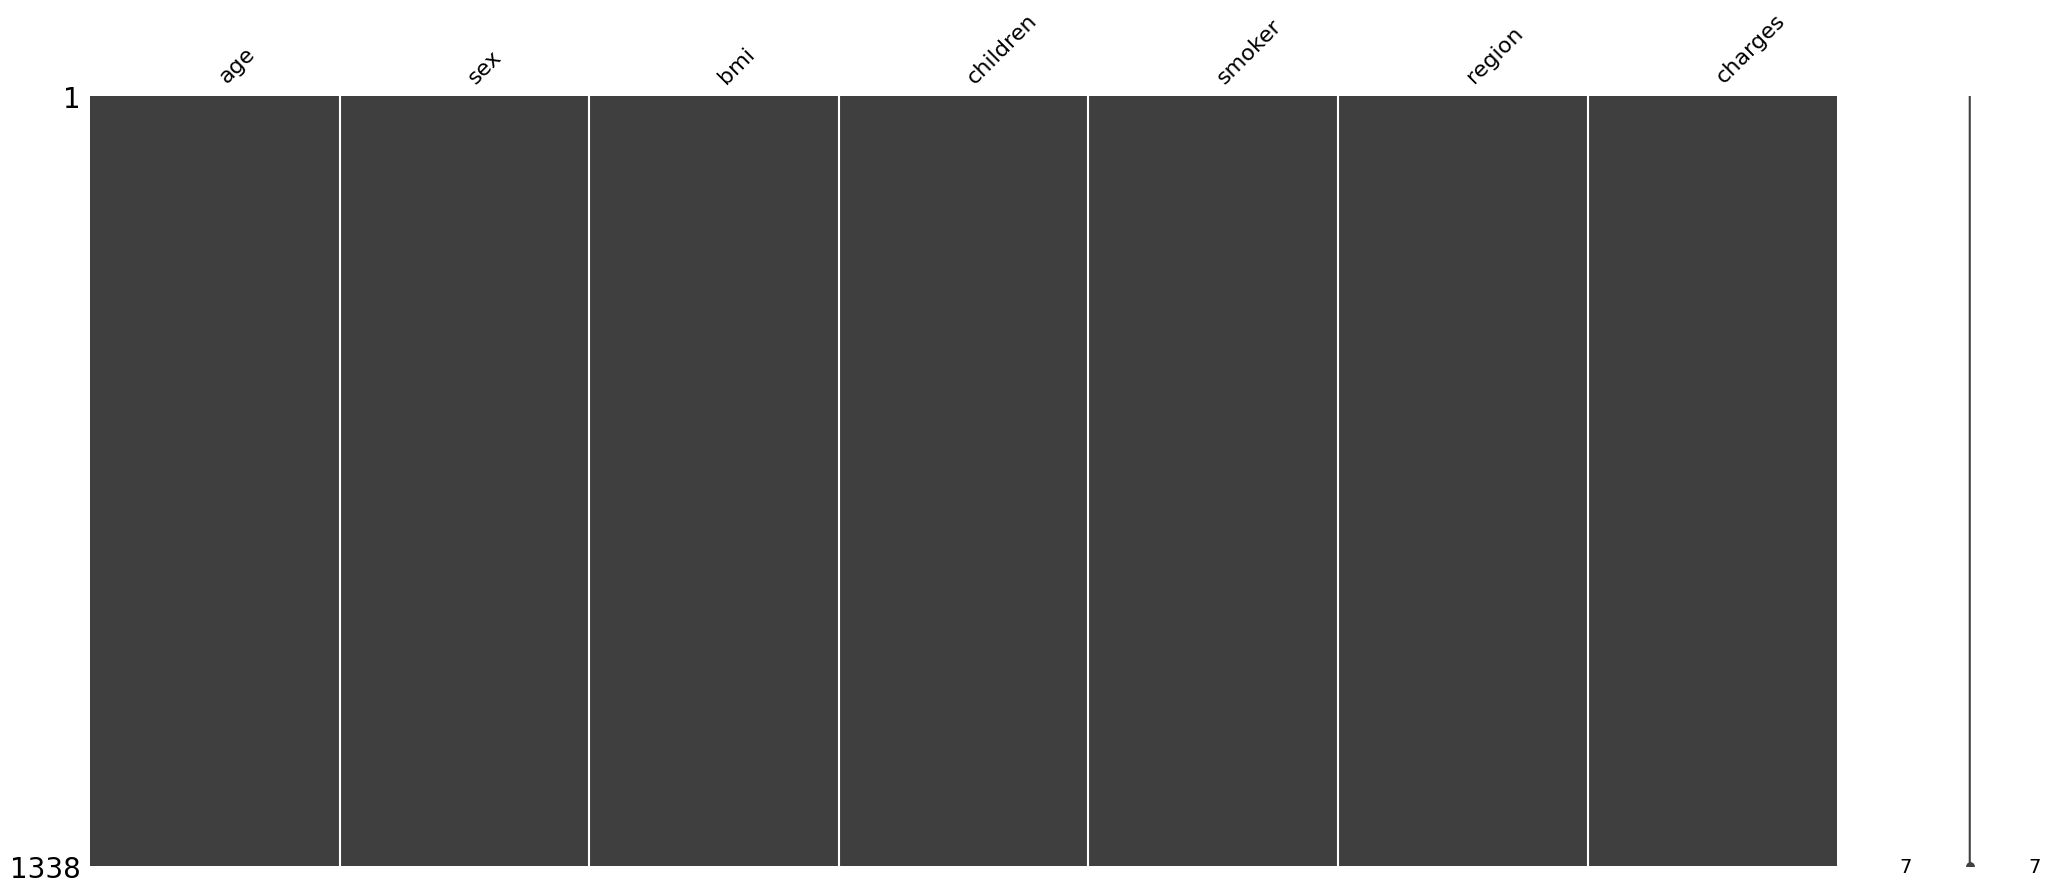

In [ ]:
import missingno as msno

msno.matrix(dados)

In [ ]:
dados.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Criado um novo dataframe convertendo as colunas categóricas binárias "sex" e "smoker" em números utilizando o LabelEncoder, e a coluna nominal "region" aplicando o OneHotEncoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dados_categorizados = dados.copy()

for col in ['sex', 'smoker']:
    dados_categorizados[col] = le.fit_transform(dados_categorizados[col])

dummy_region = pd.get_dummies(dados_categorizados["region"], prefix="dummy")

dados_categorizados = pd.concat([dados_categorizados,dummy_region],axis=1)
dados_categorizados.drop("region",axis=1,inplace=True)
dados_categorizados

,age,sex,bmi,children,smoker,charges,dummy_northeast,dummy_northwest,dummy_southeast,dummy_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

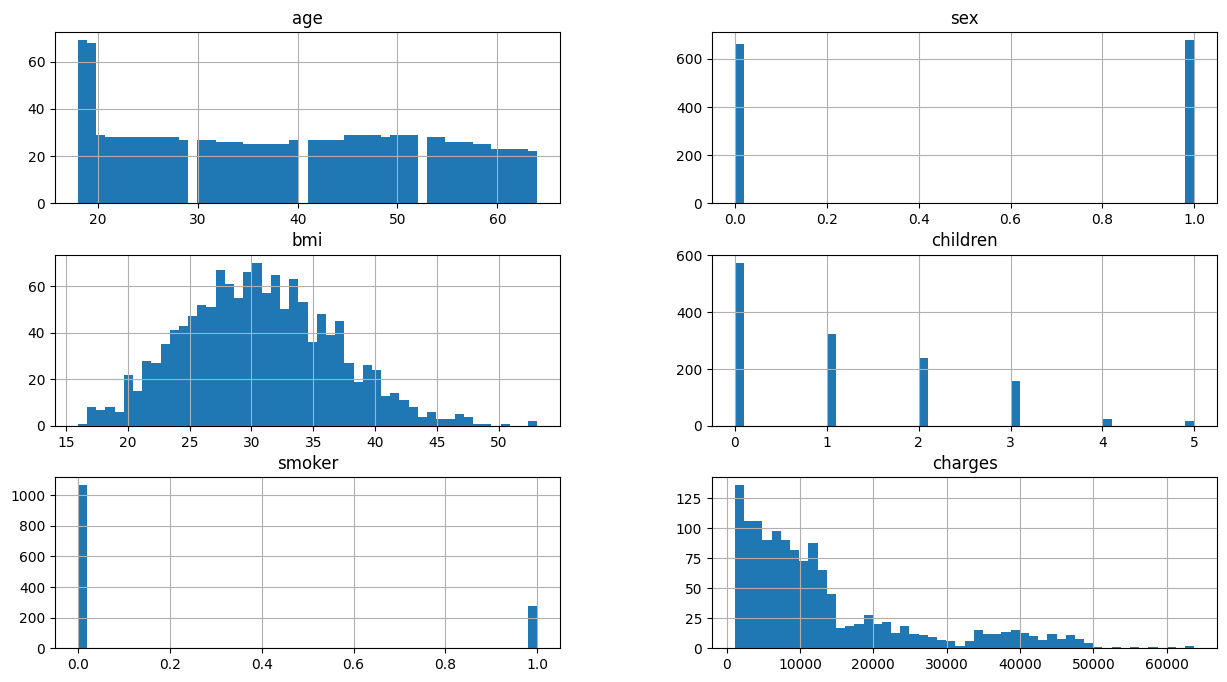

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

dados_categorizados.hist(bins=50, figsize=(15,8))

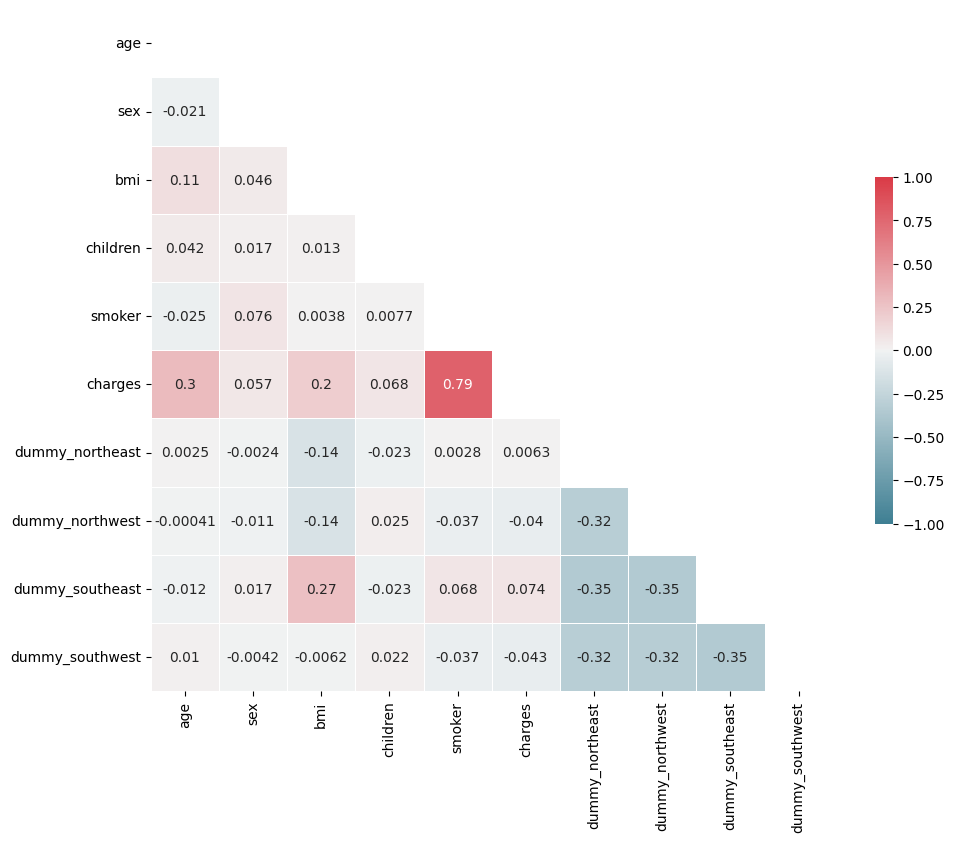

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo a correlação dos dados
corr = dados_categorizados.corr()

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

Insight :: Fumar tem o maior impacto nos custos médicos (charges) com uma correlação forte de 0.79. Isso é significativamente mais alto do que idade, IMC ou qualquer outra variável.



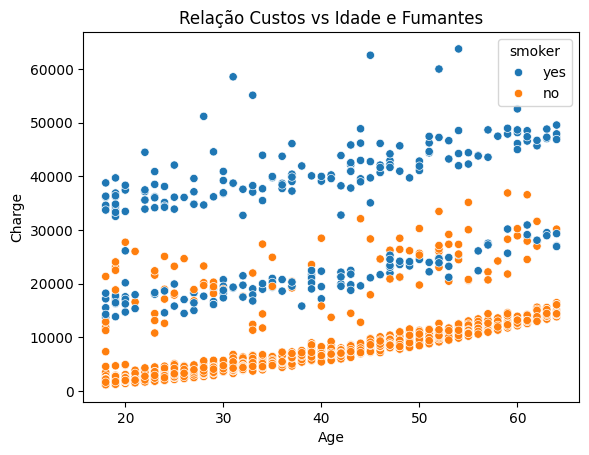

In [ ]:
import seaborn as sns

sns.scatterplot(data=dados, x='age', y='charges', hue='smoker')
plt.title('Relação Custos vs Idade e Fumantes')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()

In [ ]:
import plotly.express as px

# fig = px.scatter(dados, x='custo', y='idade', color='fuma')
fig = px.scatter(dados, x='age', y='charges', trendline_color_override='red', trendline='ols', color='smoker')
fig.show()

<Axes: xlabel='age'>

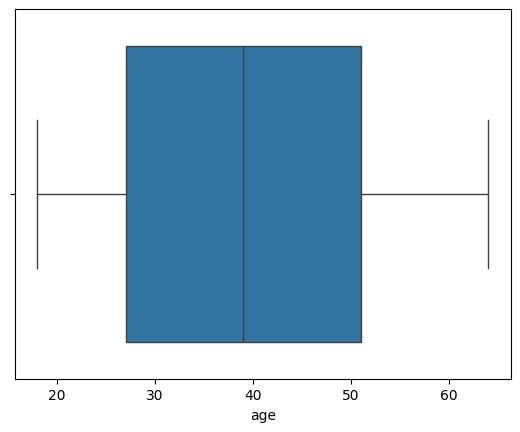

In [ ]:
import seaborn as sb
sb.boxplot(x=dados['age'])

<Axes: xlabel='charges'>

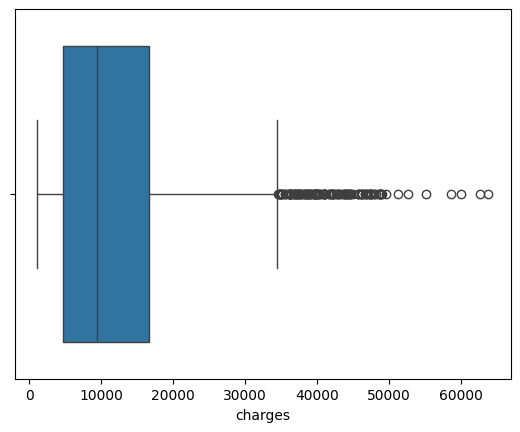

In [ ]:
sb.boxplot(x=dados['charges'])

outliers :: acima de ~35.000, alguns chegando a mais de 60.000.

Smoker é a variável que mais influencia charges. Vamos usa-la como critério de estratificação no train_test_split, tendo uma amostra equilibrada desse critério entre a base de treino e teste.

In [ ]:
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df_encoded, test_size = 0.2, stratify=df_encoded['smoker_yes'], random_state = 7)

from sklearn.model_selection import train_test_split

X = dados_categorizados.drop('charges', axis=1)
y = dados_categorizados['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=dados_categorizados['smoker'], random_state=42)

In [ ]:
print(f"{len(X_train)} linhas na base de treinamento\n{len(X_test)} linhas na base de teste")

896 linhas na base de treinamento
442 linhas na base de teste


**Regressão Linear**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score,accuracy_score,mean_squared_error,mean_absolute_percentage_error
from math import sqrt

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('Métricas - Regressão Linear:')
print("="*50)
print(f'R²: {r2_score(y_test, lr_model.predict(X_test)):.2f}')
print(f'MAE: {mean_absolute_error(y_test, lr_model.predict(X_test)):.2f}')
print(f'MSE: {mean_squared_error(y_test, lr_model.predict(X_test)):.2f}')
print(f'RMSE: {root_mean_squared_error(y_test, lr_model.predict(X_test)):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, lr_model.predict(X_test), sample_weight=y_test):.2f}%')

Métricas - Regressão Linear:
R²: 0.77
MAE: 4084.33
MSE: 33501619.41
RMSE: 5788.06
MAPE: 0.31%


**Árvore de Decisão**

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

print('Métricas - Árvore de Decisão:')
print("="*50)
print(f'R²: {r2_score(y_test, tree_reg.predict(X_test)):.2f}')
print(f'MAE: {mean_absolute_error(y_test, tree_reg.predict(X_test)):.2f}')
print(f'MSE: {mean_squared_error(y_test, tree_reg.predict(X_test)):.2f}')
print(f'RMSE: {root_mean_squared_error(y_test, tree_reg.predict(X_test)):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, tree_reg.predict(X_test), sample_weight=y_test):.2f}%')

Métricas - Árvore de Decisão:
R²: 0.68
MAE: 3264.88
MSE: 47154064.35
RMSE: 6866.88
MAPE: 0.25%


Vamos avaliar algumas métricas da árvore, para verificar se podemos otimizar seu desempenho

In [ ]:
# verificando a profundidade da árvore
print(f"Número de nós: {tree_reg.tree_.node_count}")
print(f"Número de folhas: {tree_reg.tree_.n_leaves}")
print(f"Profundidade máxima: {tree_reg.tree_.max_depth}")

Número de nós: 1787
Número de folhas: 894
Profundidade máxima: 19


In [ ]:
# vamos podar nossa árvore, buscando deixá-la a mais generalista possível. Vamos definir alguns hiperparametros para avaliar o melhor para nosso modelo.
param_grid = {
    "max_depth": [4,8,12],
    "min_samples_leaf": [2,5,10],
    "min_samples_split": [5,10,15],
    "max_leaf_nodes": [None, 100, 500]
}

In [ ]:
# para testar cada opção do conjunto, vamos utilizar o gridsearch_cv do sklearn para nos auxiliar a avaliar o melhor conjunto dos hiperparametros.
from sklearn.model_selection import GridSearchCV

# n_jobs -1 permite um melhor processamento
grid_search_tree_reg = GridSearchCV(tree_reg, param_grid, scoring="neg_root_mean_squared_error", cv=5,n_jobs=-1)
grid_search_tree_reg.fit(X_train, y_train)

# após treinar o modelo, vamos buscar o melhor modelo avaliado
tree_reg_otimizado = grid_search_tree_reg.best_estimator_

print("Melhores parametros: ", grid_search_tree_reg.best_params_)

Melhores parametros:  {'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [ ]:
print('Métricas - Árvore de Decisão Otimizada:')
print("="*50)
print(f'R²: {r2_score(y_test, tree_reg_otimizado.predict(X_test)):.2f}')
print(f'MAE: {mean_absolute_error(y_test, tree_reg_otimizado.predict(X_test)):.2f}')
print(f'MSE: {mean_squared_error(y_test, tree_reg_otimizado.predict(X_test)):.2f}')
print(f'RMSE: {root_mean_squared_error(y_test, tree_reg_otimizado.predict(X_test)):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, tree_reg_otimizado.predict(X_test), sample_weight=y_test):.2f}%')

print('\n\nMétricas - Árvore de Decisão sem hiperparametros:')
print("="*50)
print(f'R²: {r2_score(y_test, tree_reg.predict(X_test)):.2f}')
print(f'MAE: {mean_absolute_error(y_test, tree_reg.predict(X_test)):.2f}')
print(f'MSE: {mean_squared_error(y_test, tree_reg.predict(X_test)):.2f}')
print(f'RMSE: {root_mean_squared_error(y_test, tree_reg.predict(X_test)):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, tree_reg.predict(X_test), sample_weight=y_test):.2f}%')

Métricas - Árvore de Decisão Otimizada:
R²: 0.87
MAE: 2721.37
MSE: 19718392.47
RMSE: 4440.54
MAPE: 0.21%


Métricas - Árvore de Decisão sem hiperparametros:
R²: 0.68
MAE: 3264.88
MSE: 47154064.35
RMSE: 6866.88
MAPE: 0.25%


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(tree_reg, filled=True, rounded=True,feature_names=X_train.columns)
grafico = graphviz.Source(estrutura)
grafico

**🔎 Métricas dos Modelos**

---
<br>

| Modelo | R² | MSE (Erro Quadrático Médio) | RMSE (Raiz do Erro Quadrático Médio) |
|---|---|---|---|
| Regressão Linear   | 0.77% | 33.501.619,40  | 5.788,05  |
| Árvore de Decisão - Otimizada | 0.86% | 19.718.392,47  | 4.440,53  |

<br>

📌 Análise Comparativa
<br>
<br>

✅ **1. Regressão Linear**

R² de 0.77 significa que o modelo consegue explicar 77% da variabilidade nos custos de plano de saúde.
<br>

RMSE = 5.788,05 indica um erro médio razoavelmente bom, considerando os valores dos custos (se estão na casa dos milhares).
<br>

**Conclusão:** Um modelo simples e eficiente. Boa escolha inicial.
<br>
<br>

✅ **2. Árvore de Decisão - Otimizada**

Apresenta o melhor desempenho, com R² = 0.86 (86% da variabilidade explicada).

Menor MSE e RMSE → erro médio de 4.440,53, mais baixo o anterior.

**Conclusão:** A árvore se ajusta melhor ao padrão dos dados, podendo capturar relações não lineares que a regressão linear não capta.

🎯 **Conclusão Final**
<br>
<br>
✅ Embora a Regressão Linear seja boa, especialmente se você precisa de interpretabilidade e simplicidade, a Árvore de Decisão é o modelo com melhor desempenho geral, explicando mais a variabilidade dos custos e com menor erro médio.